# Delhi Stubble- Samvit IBM

sri:

## What it does
Our project, EcoStubbleAI, uses cutting-edge AI technology to tackle the issue of stubble burning in the Delhi and Punjab regions. It takes images of grain and field conditions as inputs and generates detailed reports on stubble volume and quality. These reports are essential for optimizing stubble disposal. We aim to efficiently deliver this valuable resource to power generation firms, promoting the production of electricity through sustainable means while minimizing the environmental impact. In essence, our project offers a smarter, more eco-friendly solution to stubble disposal, addressing both health concerns and environmental issues in the region.

## How we built it
We built EcoStubbleAI using a powerful stack of technologies. Python served as the core programming language, facilitating versatile development. OpenCV was instrumental for image processing, while Flask enabled the creation of a user-friendly app. We harnessed machine learning libraries like numpy and others to develop robust AI models. Crucially, an externally sourced dataset played a pivotal role in model training and validation, enhancing our system's accuracy. Through a synergistic blend of these tools and data sources, we meticulously constructed EcoStubbleAI, a pioneering solution for efficient stubble disposal, addressing environmental concerns and advancing sustainable energy practices.


##Dataset
Sourced externally as proof of concept to resemble stubble

## Results

### Sample-1
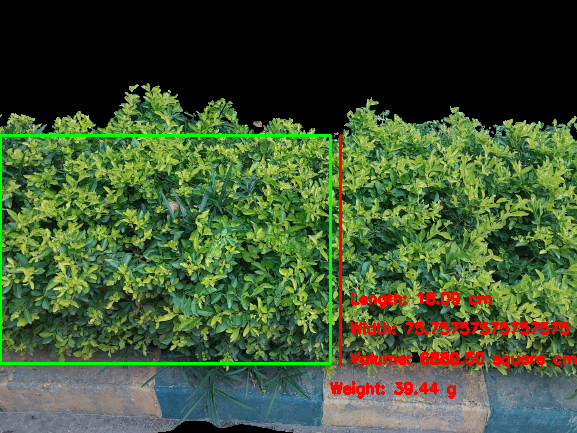

####Length: 18.09 cm
####Width: 75.75757575757575 cm
####Volume: 6880.50 square cm
####Weight: 39.44 g


##Sample-2
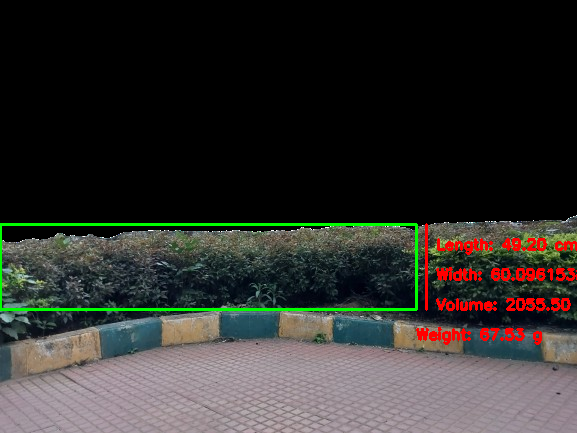

####Length: 49.20 cm
####Width: 60.096153846153854 cm
####Volume: 2055.50 cubic cm
####Weight: 67.53 g


##Sample-3
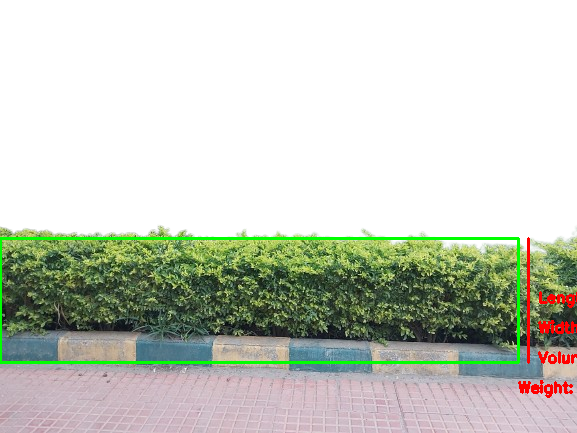

####Length: 145.78 cm
####Width: 183.8235294117647 cm
####Volume: 840.00 square cm
####Weight: 1871.90 g

We take immense pride in our accomplishments with EcoStubbleAI. Firstly, we've successfully implemented a seamless app that efficiently captures the precise location of farmers' fields. We've devised a sophisticated image analysis system that accurately assesses field conditions, enabling optimized stubble disposal. Moreover, we've developed strong logistical capabilities to gather and transport stubble efficiently, reducing environmental impact and improving local air quality. These achievements reflect our unwavering commitment to environmental preservation and technological innovation, providing farmers with sustainable solutions while contributing to a healthier ecosystem. Our accomplishment lies in creating a bridge between technology and agriculture, transforming stubble into a valuable resource for cleaner air and sustainable energy.

In [49]:
# Defining path to directory
directory_path = '/content/drive/MyDrive/IBM Samvit Dataset/Processed'
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# cv2_imshow(image_path)

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
def compute_dimensions(ip):

  # Load the image
  image = cv2.imread(ip)

  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Canny edge detection
  edges = cv2.Canny(gray, 50, 150, apertureSize=3)

  # Find contours
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Filter and select the largest contour
  if contours:
      largest_contour = max(contours, key=cv2.contourArea)

      # Calculate the bounding box for width
      x, y, w, h = cv2.boundingRect(largest_contour)

      # Compute the width of the shape
      width = w

      # Calculate the length of the shape using the contour's perimeter
      length = cv2.arcLength(largest_contour, True)

      # Compute the area
      area = cv2.contourArea(largest_contour)

      # Display with the bounding box
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

      # Draw a line next to the width
      line_start = (x + w + 10, y)
      line_end = (x + w + 10, y + h)
      cv2.line(image, line_start, line_end, (0, 0, 255), 2)

      length = (2/ length) * 125 * 1000
      width = (2/ width) * 125 * 100
      height = width
      volume = length * width * height * 2
      mass = volume * .000190 * 1

      # Write the length, width, and area over the image in red color
      length_text = f"Length: {length:.2f} cm"
      width_text = f"Width: {width} cm"
      volume_text = f"Volume: {area:.2f} square cm"
      mass_text = f"Weight: {mass:.2f} g"

      cv2.putText(image, length_text, (x + w + 20, y + h - 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
      cv2.putText(image, width_text, (x + w + 20, y + h - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
      cv2.putText(image, volume_text, (x + w + 20, y + h), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
      cv2.putText(image, mass_text, (x + w, y + h + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

      print(ip, length_text, width_text, volume_text, mass_text, sep='\n' )

      # Display the image with width, length, and area
      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()
  else:
      print("No contours found in the image.")


/content/drive/MyDrive/IBM Samvit Dataset/Processed/20231020_175209-removebg-preview.png
Length: 81.13 cm
Width: 121.35922330097087 cm
Volume: 1281.00 square cm
Weight: 454.07 g


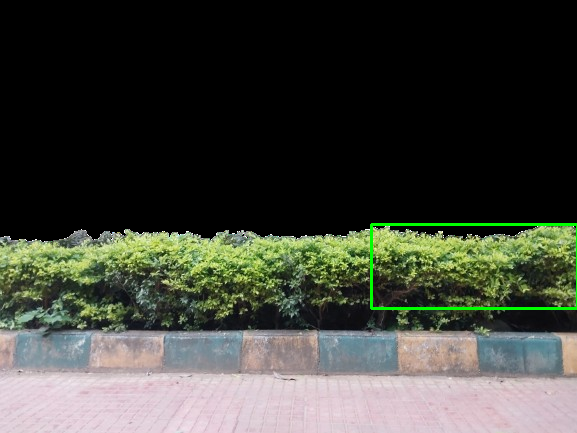

/content/drive/MyDrive/IBM Samvit Dataset/Processed/20231020_175241-removebg-preview.png
Length: 142.91 cm
Width: 268.8172043010753 cm
Volume: 996.50 square cm
Weight: 3924.39 g


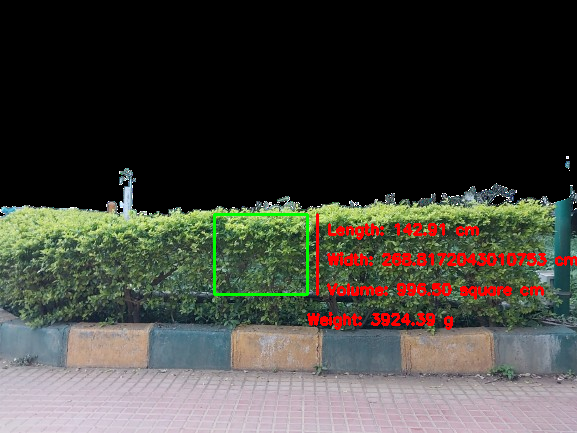

/content/drive/MyDrive/IBM Samvit Dataset/Processed/IMG-20231020-WA0031-removebg-preview.png
Length: 100.56 cm
Width: 193.7984496124031 cm
Volume: 1153.00 square cm
Weight: 1435.23 g


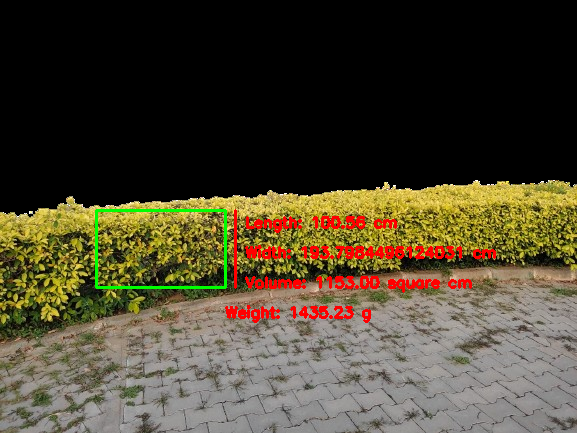

/content/drive/MyDrive/IBM Samvit Dataset/Processed/20231020_174740-removebg-preview.png
Length: 39.40 cm
Width: 48.262548262548265 cm
Volume: 2428.50 square cm
Weight: 34.87 g


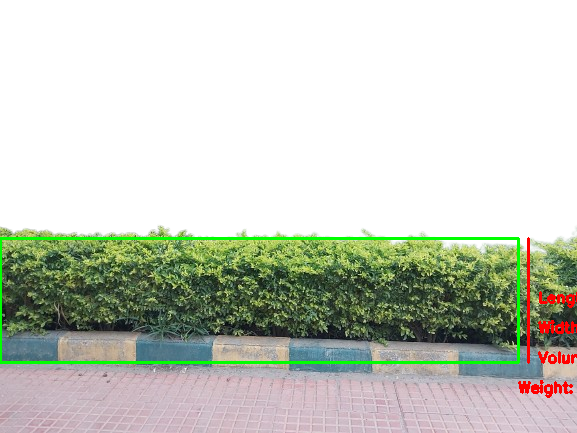

/content/drive/MyDrive/IBM Samvit Dataset/Processed/20231020_175309-removebg-preview.png
Length: 145.78 cm
Width: 183.8235294117647 cm
Volume: 840.00 square cm
Weight: 1871.90 g


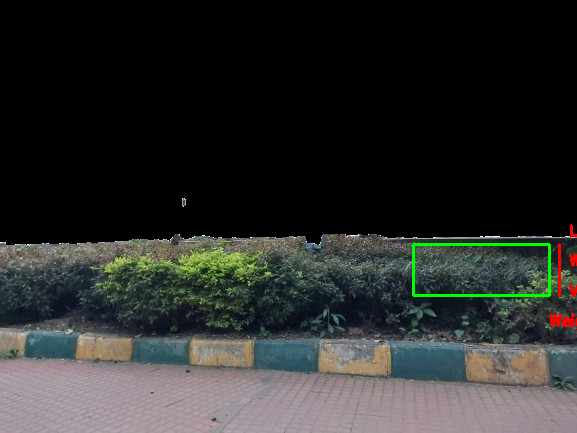

/content/drive/MyDrive/IBM Samvit Dataset/Processed/20231020_175256-removebg-preview.png
Length: 49.20 cm
Width: 60.096153846153854 cm
Volume: 2055.50 square cm
Weight: 67.53 g


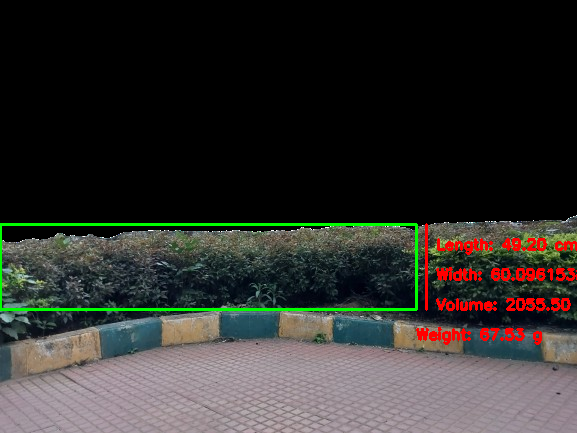

/content/drive/MyDrive/IBM Samvit Dataset/Processed/20231020_174746-removebg-preview.png
Length: 18.09 cm
Width: 75.75757575757575 cm
Volume: 6880.50 square cm
Weight: 39.44 g


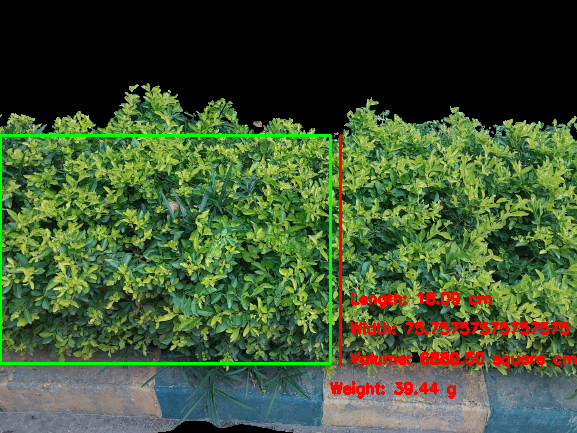

In [52]:
import os

# Check for directory path
if os.path.exists(directory_path) and os.path.isdir(directory_path):

    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)

        if os.path.isfile(file_path):
          compute_dimensions(file_path)
else:
    print(f"The directory '{directory_path}' does not exist.")
